<a href="https://colab.research.google.com/github/Yeen000/Aiffel/blob/master/1_data_cleang%26table_making.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 설정 및 상황정의

In [ ]:
!pip install koreanize-matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import koreanize_matplotlib

plt.rc('font', family='NanumBarunGothic')

In [ ]:
!pip install koreanize-matplotlib

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

### 📍 **비즈니스 상황 시나리오**
여러분은 인스타카트(Instacart) 데이터사이언스팀에 데이터 분석가로 입사했어요. 글로벌 식료품 배달 서비스인 인스타카트는 빠르게 성장하고 있습니다. 이에 따라 마케팅팀에서는 더 효과적인 타겟 마케팅 전략을 수립하기 위해 고객 세그먼테이션 분석을 요청했습니다.

👉🏻 분석가의 미션
마케팅팀의 요청에 따라 여러분은 <고객 세그먼테이션 프로젝트>를 진행하게 되었습니다.현재 인스타카트는 다양한 고객 데이터(구매 이력, 쇼핑 행동, 선호 상품 카테고리, 지불 방식 등)를 보유하고 있으며, 이 데이터를 활용하여 의미 있는 고객 세그먼트를 발견하고 각 세그먼트별 맞춤 마케팅 전략을 제안해주세요! 분석 레포트는 마케팅팀이 이해하기 쉽도록 비즈니스 언어로 치환해서 발표하는 방식으로 작성해주세요.

### 📍 **프로젝트 가이드라인**

[필수 사항]\
✔️ 각 컬럼(변수)에 대한 데이터 특성과 서비스 현황을 파악해주세요.\
✔️ 고객 세그먼테이션 기법 중 한가지를 선정해서 군집을 분석해주세요.\
✔️ 군집별 상세한 마케팅 전략을 수립해주세요.\
✔️ Python 라이브러리를 활용해주세요.

[선택 사항]\
✔️ 파생 변수를 만들어주세요.\
✔️ Python 코드에 대한 주석과 마크다운을 정리해주세요.

## 데이터 불러오기

In [ ]:
ais = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IM/aisles.csv")
dep = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/departments.csv")
oprior = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/order_products__prior.csv")
otrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/order_products__train.csv")
ord = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/orders.csv")
prod = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/products.csv")

# 데이터 확인
print("Aisles\n", ais.head(), "\n")
print("Departments\n", dep.head(), "\n")
print("Order Prior\n", oprior.head(), "\n")
print("Order Train\n", otrain.head(), "\n")
print("Orders\n", ord.head(), "\n")
print("Products\n", prod.head(), "\n")

Aisles
    aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation 

Departments
    department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol 

Order Prior
    order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0 

Order Train
    order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0

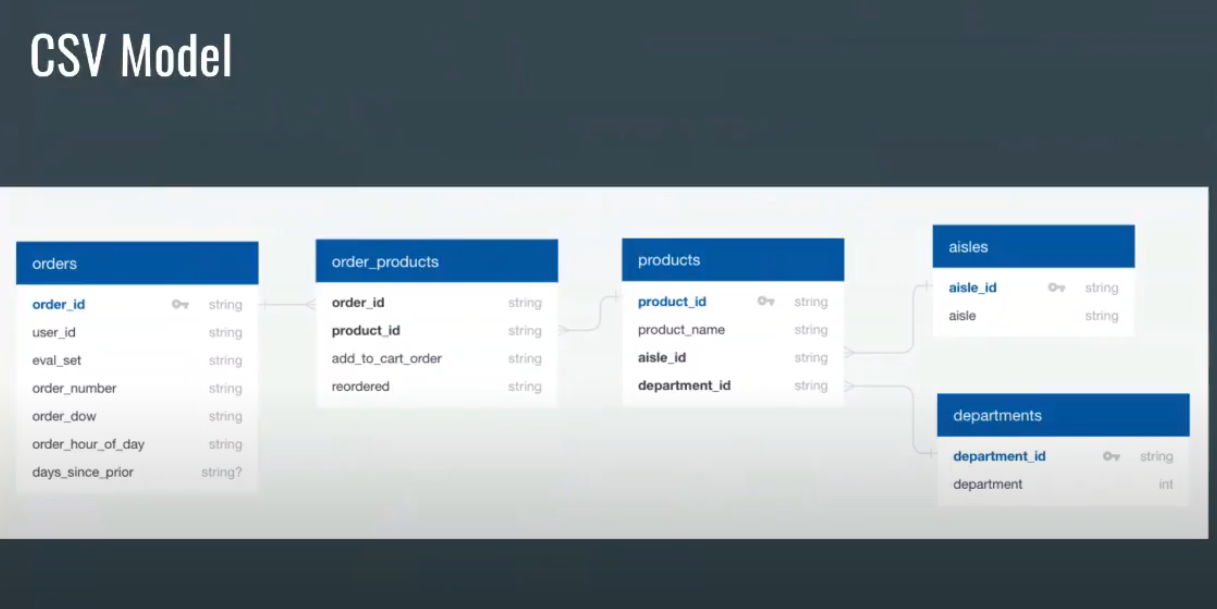

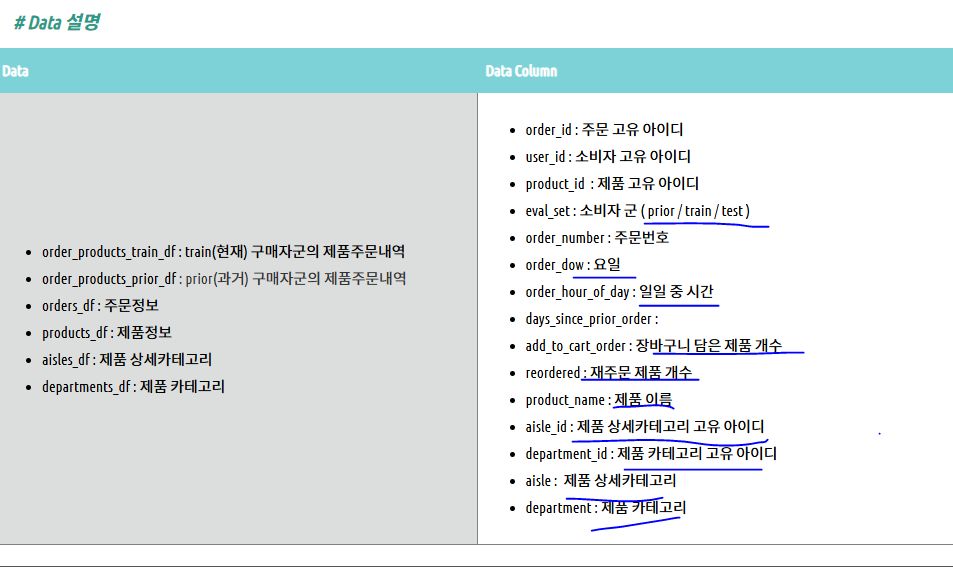

## 데이터프레임 확인

In [ ]:
ord.head(100)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
95,1468214,11,prior,7,5,9,30.0
96,1376945,11,test,8,6,11,8.0
97,1483446,12,prior,1,1,12,NaN
98,1247527,12,prior,2,5,9,30.0


In [ ]:
ord[ord['order_id'] == 1468214]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
95,1468214,11,prior,7,5,9,30.0


In [ ]:
oprior[oprior['order_id'] == 1468214]

,order_id,product_id,add_to_cart_order,reordered
13912014,1468214,24799,1,0
13912015,1468214,17706,2,0
13912016,1468214,33572,3,1
13912017,1468214,27959,4,1
13912018,1468214,48697,5,0
13912019,1468214,49374,6,0
13912020,1468214,8309,7,1
13912021,1468214,30563,8,0
13912022,1468214,5989,9,0
13912023,1468214,41909,10,0


## ord['eval_set] 상세

- 그냥 다 합쳐서 보는 것이 나을 것 같다! orders 다

In [ ]:
ord[ord['eval_set'] == 'prior'].head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
ord[ord['eval_set'] == 'test'].head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


In [ ]:
ord[ord['eval_set'] == 'train'].head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


In [ ]:
ord['eval_set'].value_counts()

,count
eval_set,
prior,3214874
train,131209
test,75000


In [ ]:
def get_unique_count(x):
    return len(np.unique(x))
cnt_srs = ord.groupby("eval_set")["user_id"].aggregate(get_unique_count).reset_index()
cnt_srs

,eval_set,user_id
0,prior,206209
1,test,75000
2,train,131209


In [ ]:
# 각 eval_set에 속한 user_id 리스트 생성
prior_users = set(ord[ord["eval_set"] == "prior"]["user_id"])
train_users = set(ord[ord["eval_set"] == "train"]["user_id"])
test_users = set(ord[ord["eval_set"] == "test"]["user_id"])

# 교집합 확인
prior_train_overlap = prior_users.intersection(train_users)  # prior과 train 겹치는 user_id
prior_test_overlap = prior_users.intersection(test_users)  # prior과 test 겹치는 user_id
train_test_overlap = train_users.intersection(test_users)  # train과 test 겹치는 user_id

# 결과 출력
print("prior ∩ train :", len(prior_train_overlap))  # 예상: prior 주문은 모두 ord에 포함될 가능성이 높음
print("prior ∩ test :", len(prior_test_overlap))  # 예상: train 주문도 ord에 포함될 가능성이 높음
print("train ∩ test :", len(train_test_overlap))  # 예상: prior과 train은 다른 주문을 다룰 가능성이 높음

prior ∩ train : 131209
prior ∩ test : 75000
train ∩ test : 0


## product_orders_train/prior <-> orders 데이터셋 비교

- product_orders_train 이랑  product_orders_prior이랑 합쳐도 될 것 같다..
- orders에 test 빼도 될 것 같다..
- order_id별 가장 마지막 번호가 구매 상품수
- 그 중에서 reordered 합이 재구매상품수


**--> 그래서 order 기준으로 우선 총 데이터셋 만들어보기**

In [ ]:
# 각 테이블의 order_id 집합 생성
oprior_orders = set(oprior["order_id"])  # 과거 주문 ID
otrain_orders = set(otrain["order_id"])  # 훈련 데이터 주문 ID

# ord에서 eval_set 별 order_id 집합 생성
ord_prior_orders = set(ord[ord["eval_set"] == "prior"]["order_id"])  # eval_set이 'prior'인 order_id
ord_train_orders = set(ord[ord["eval_set"] == "train"]["order_id"])  # eval_set이 'train'인 order_id
ord_test_orders = set(ord[ord["eval_set"] == "test"]["order_id"])  # eval_set이 'test'인 order_id

# order_id 교집합 확인 (oprior와 ord의 prior/train/test 비교)
oprior_ord_prior_overlap = oprior_orders.intersection(ord_prior_orders)  # oprior ∩ ord[prior]
oprior_ord_train_overlap = oprior_orders.intersection(ord_train_orders)  # oprior ∩ ord[train]
oprior_ord_test_overlap = oprior_orders.intersection(ord_test_orders)  # oprior ∩ ord[test]

# order_id 교집합 확인 (otrain과 ord의 prior/train/test 비교)
otrain_ord_prior_overlap = otrain_orders.intersection(ord_prior_orders)  # otrain ∩ ord[prior]
otrain_ord_train_overlap = otrain_orders.intersection(ord_train_orders)  # otrain ∩ ord[train]
otrain_ord_test_overlap = otrain_orders.intersection(ord_test_orders)  # otrain ∩ ord[test]

# 결과 출력
print("oprior ∩ ord[prior] order_id 개수:", len(oprior_ord_prior_overlap))
print("oprior ∩ ord[train] order_id 개수:", len(oprior_ord_train_overlap))
print("oprior ∩ ord[test] order_id 개수:", len(oprior_ord_test_overlap))

print("otrain ∩ ord[prior] order_id 개수:", len(otrain_ord_prior_overlap))
print("otrain ∩ ord[train] order_id 개수:", len(otrain_ord_train_overlap))
print("otrain ∩ ord[test] order_id 개수:", len(otrain_ord_test_overlap))

oprior ∩ ord[prior] order_id 개수: 3214874
oprior ∩ ord[train] order_id 개수: 0
oprior ∩ ord[test] order_id 개수: 0
otrain ∩ ord[prior] order_id 개수: 0
otrain ∩ ord[train] order_id 개수: 131209
otrain ∩ ord[test] order_id 개수: 0


# 가격 데이터 생성_데이터 통합(orders_products_f)

- 가격 생성 데이터 포함해서 최종 데이터셋 만들기

In [ ]:
# 변수 확인용
# # CSV 파일 불러오기 (간단한 변수명 사용)
# ais = pd.read_csv("instacart_data/aisles.csv")
# dep = pd.read_csv("instacart_data/departments.csv")
# oprior = pd.read_csv("instacart_data/order_products__prior.csv")
# otrain = pd.read_csv("instacart_data/order_products__train.csv")
# ord = pd.read_csv("instacart_data/orders.csv")
# prod = pd.read_csv("instacart_data/products.csv")


In [ ]:
u_prod = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/u_prod.csv")
### aisle, department 값 missing, other 값은 price nan 값으로 치환

In [ ]:
u_prod[u_prod["price"].isna()]["aisle_id"].value_counts().reset_index()

,aisle_id,count
0,100,1258
1,6,548


In [ ]:
u_prod[u_prod["price"].isna()]["department_id"].value_counts().reset_index()

,department_id,count
0,21,1258
1,2,548


In [ ]:
### products 데이터에 aisles, departments 정보 병합 (정확한 병합 순서)
u_prod_1 = u_prod.merge(ais, on="aisle_id", how="left")
u_prod_f = u_prod_1.merge(dep, on="department_id", how="left")

In [ ]:
u_prod_f.isnull().sum()

,0
product_id,0
product_name,0
aisle_id,0
department_id,0
price,1806
aisle,0
department,0


In [ ]:
u_prod_f.fillna(0, inplace=True)

In [ ]:
u_prod_f.isnull().sum() #결측치 제거됨

,0
product_id,0
product_name,0
aisle_id,0
department_id,0
price,0
aisle,0
department,0


In [ ]:
### otrain 데이터에 u_prod_f 데이터를 product_id 기준으로 병합
otrain_f = otrain.merge(u_prod_f, on="product_id", how="left")

In [ ]:
otrain_f.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,price,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,4.42,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,5.72,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,2.84,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,1.55,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,18.04,canned meat seafood,canned goods


In [ ]:
### oprior 데이터에 u_prod_f 데이터를 product_id 기준으로 병합
oprior_f= oprior.merge(u_prod_f, on="product_id", how="left")

In [ ]:
oprior_f.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,price,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,9.05,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,3.88,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,5.80,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,17.10,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,3.40,baking ingredients,pantry


In [ ]:
orders_products_f= pd.concat([otrain_f, oprior_f], axis=0, ignore_index=True)
orders_products_f
### 33,819,106 개수 확인

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,price,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,4.42,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,5.72,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,2.84,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,1.55,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,18.04,canned meat seafood,canned goods
...,...,...,...,...,...,...,...,...,...,...
33819101,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,4.96,dish detergents,household
33819102,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,7.46,crackers,snacks
33819103,3421083,4600,8,0,All Natural French Toast Sticks,52,1,10.45,frozen breakfast,frozen
33819104,3421083,24852,9,1,Banana,24,4,25.33,fresh fruits,produce


In [ ]:
orders_products_f.isnull().sum()

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0
product_name,0
aisle_id,0
department_id,0
price,0
aisle,0
department,0


# orders에 붙이기 및 최종 데이터셋 생성(f_orders)

- orders에서 eval_set 컬럼의 test 제거

In [ ]:
ord_filtered = ord[ord["eval_set"] != "test"].copy()

In [ ]:
## Instacart order_products_prior 데이터 요약
order_count_summary = orders_products_f.groupby("order_id").agg(
    cart_order_cnt=("add_to_cart_order", "max"),
    reorder_cnt=("reordered", "sum")
).reset_index()

# 구매 상품 가격 총합
order_price_summary = orders_products_f.groupby("order_id").agg(
    total_price=("price", "sum"),  # 총 구매 금액
).reset_index()

# 구매 상품 가격 총합
order_max_price_summary = orders_products_f.groupby("order_id").agg(
    total_price=("price", "max"),  # 최고 구매금액
).reset_index()

### 재구매 상품(reordered=1)만 필터링 후 가격 총합
order_reordered_price_summary = orders_products_f[orders_products_f["reordered"] == 1].groupby("order_id").agg(
    total_reordered_price=("price", "sum"),  # 재구매 상품 총 금액
).reset_index()

### 주문 데이터(order)에 병합
orders_1 = ord_filtered.merge(order_count_summary, on="order_id", how="left")
orders_2 = orders_1.merge(order_max_price_summary, on="order_id", how="left")
orders_3 = orders_2.merge(order_price_summary, on="order_id", how="left")
f_orders = orders_3.merge(order_reordered_price_summary, on="order_id", how="left")

In [ ]:
f_orders.isnull().sum()

,0
order_id,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,206209
cart_order_cnt,0
reorder_cnt,0
total_price_x,0


In [ ]:
f_orders.head()
# total_price_x 총합
# total_price_y 최고

f_orders = f_orders.rename(columns={
    "total_price_x": "total_price",  # 총합으로 변경
    "total_price_y": "max_price"     # 최고값으로 변경
})

In [ ]:
f_orders.head(1)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,cart_order_cnt,reorder_cnt,total_price,max_price,total_reordered_price
0,2539329,1,prior,1,2,8,NaN,5,0,12.06,42.11,NaN


## f_orders 결측치 데이터 확인

- 50만개 제거
- 날짜차이 데이터는 0 값으로 대체

In [ ]:
# 1. 데이터프레임 크기(shape) 비교
print("\n[데이터프레임 크기 비교]")
print("ord shape:", f_orders.shape)

# 2. 기본 통계량 비교
print("\n[기본 통계량 비교]")
print("ord 통계량:", f_orders.describe)

# 3. 결측치 개수 비교
print("\n[결측치 개수 비교]")
print("ord 결측치:", f_orders.isnull().sum())

# 4. 각 컬럼의 고유값 개수 비교
print("\n[고유값 개수 비교]")
print("\f_orders 고유값 개수:")


[데이터프레임 크기 비교]
ord shape: (3346083, 12)

[기본 통계량 비교]
ord 통계량: <bound method NDFrame.describe of          order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2398795        1    prior             2          3   
2          473747        1    prior             3          3   
3         2254736        1    prior             4          4   
4          431534        1    prior             5          4   
...           ...      ...      ...           ...        ...   
3346078   2266710   206209    prior            10          5   
3346079   1854736   206209    prior            11          4   
3346080    626363   206209    prior            12          1   
3346081   2977660   206209    prior            13          1   
3346082    272231   206209    train            14          6   

         order_hour_of_day  days_since_prior_order  cart_order_cnt  \
0                        8                     NaN              

In [ ]:
# days_since_prior_order 컬럼의 NaN 값을 0으로 채우기
f_orders["days_since_prior_order"].fillna(0, inplace=True)

In [ ]:
f_orders.isnull().sum()

,0
order_id,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
cart_order_cnt,0
reorder_cnt,0
total_price,0


In [ ]:
sample = f_orders[f_orders["total_reordered_price"].isna()]
sample['reorder_cnt'].value_counts() #reorder이 없어서 null값

,count
reorder_cnt,
0,397115


In [ ]:
f_orders[f_orders["total_reordered_price"].isnull()]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,cart_order_cnt,reorder_cnt,total_price,max_price,total_reordered_price
0,2539329,1,prior,1,2,8,0.0,5,0,12.06,42.11,NaN
11,2168274,2,prior,1,2,11,0.0,13,0,40.58,179.55,NaN
23,3268552,2,prior,13,4,11,30.0,9,0,18.91,86.22,NaN
26,1374495,3,prior,1,1,14,0.0,10,0,49.68,203.40,NaN
38,3343014,4,prior,1,6,11,0.0,4,0,17.59,35.42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3345942,596604,206206,prior,6,0,17,1.0,1,0,9.89,9.89,NaN
3345975,538554,206206,prior,39,6,19,1.0,7,0,13.21,47.76,NaN
3346004,2166133,206207,prior,1,6,19,0.0,24,0,40.58,258.43,NaN
3346020,2227043,206208,prior,1,1,15,0.0,12,0,40.58,218.79,NaN


In [ ]:
# total_reordered_price 컬럼의 NaN 값을 0으로 채우기
f_orders["total_reordered_price"].fillna(0, inplace=True)

In [ ]:
f_orders.isnull().sum()

,0
order_id,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
cart_order_cnt,0
reorder_cnt,0
total_price,0


In [ ]:
# f_orders.to_csv("/content/drive/MyDrive/Colab Notebooks/IM/f_orders.csv", index=False)

In [ ]:
# sample_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/아이펠/아이펠 통계_프로젝트/프로젝트_공유드라이브/f_orders_20250312_1153.csv')
# sample_df

# USERS 테이블 생성

In [ ]:
f_orders.head(1)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,cart_order_cnt,reorder_cnt,total_price,max_price,total_reordered_price
0,2539329,1,prior,1,2,8,0.0,5,0,12.06,42.11,0.0


In [ ]:
f_orders["is_reorder"] = (f_orders["reorder_cnt"] > 0).astype(int)

In [ ]:
# user_id 기준으로 총 구매수, 총 재구매수 합, 1인당 평균 구매가격, 1인당 평균 재구매가격 계산
users = f_orders.groupby("user_id").agg(
    total_reorder_count=("is_reorder", "sum"),  # 총 재구매 발생 횟수
    avg_cart_order_cnt=("cart_order_cnt", "mean"),  # 평균 장바구니 크기(품목수)
    avg_reorder_cnt=("reorder_cnt", "mean"),  # 평균 재구매 품목수
    avg_reorder_price=("total_reordered_price", "mean"),  # 평균 재구매 가격
    avg_days_since_prior_order=("days_since_prior_order", "mean"),# 평균 재구매 주기
    recency=("days_since_prior_order", "max"),  # 가장 최근 구매 이후 지난 일수
    frequency=("order_number", "max"),  # 총 주문 횟수
    monetary=("total_price", "mean")  # 평균 구매 가격 (거래 금액)
).reset_index()

users

#total_purchases=("cart_order_cnt", "sum"),# 총 구매품목수(이건 중복제거가 안됨)

,user_id,total_reorder_count,avg_cart_order_cnt,avg_reorder_cnt,avg_reorder_price,avg_days_since_prior_order,recency,frequency,monetary
0,1,10,6.363636,4.636364,38.622727,17.272727,30.0,11,16.638182
1,2,13,15.066667,7.000000,92.113333,15.200000,30.0,15,40.797333
2,3,11,7.333333,4.583333,69.029167,11.083333,21.0,12,39.950833
3,4,1,3.600000,0.200000,3.518000,11.000000,21.0,5,75.114000
4,5,4,9.200000,3.600000,54.768000,9.200000,19.0,5,31.908000
...,...,...,...,...,...,...,...,...,...
206204,206205,3,12.750000,3.500000,59.250000,12.500000,30.0,4,60.330000
206205,206206,63,4.253731,2.014925,22.413582,3.716418,15.0,67,23.968209
206206,206207,15,13.937500,8.187500,79.393125,13.437500,30.0,16,35.010000
206207,206208,48,13.816327,9.775510,124.762449,7.285714,20.0,49,35.420204


# 데이터 내보내기

In [ ]:
# users.to_csv("/content/drive/MyDrive/Colab Notebooks/아이펠/아이펠 통계_프로젝트/users.csv", index=False)
# f_orders.to_csv("/content/drive/MyDrive/Colab Notebooks/아이펠/아이펠 통계_프로젝트/f_orders.csv", index=False)
# orders_products_f.to_csv("/content/drive/MyDrive/Colab Notebooks/아이펠/아이펠 통계_프로젝트/orders_products_f.csv", index=False)